# 02_Price-Predictor-Linear-Regression-Adjusted-for-Inflation

In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings

In [23]:
# Read Cali Income by Zip 
file_path = Path("Resources/NY_ZIP_Income.csv")
df_ny_incomes = pd.read_csv(file_path, header=0)
# Display sample data
df_ny_incomes.head(10)

,zip_code,income
0,10001,92840
1,10002,36982
2,10003,118161
3,10004,190223
4,10005,189702
5,10006,179044
6,10007,224063
7,10009,63717
8,10010,132988
9,10011,138272


In [24]:
# Read realtor data
file_path = Path("Resources/realtor-data.csv")
df_realtor = pd.read_csv(file_path)
# Display sample data
df_realtor.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [25]:
joined_df = pd.merge(df_ny_incomes, df_realtor, on='zip_code')
joined_df.head(10)

,zip_code,income,status,bed,bath,acre_lot,city,state,house_size,prev_sold_date,price
0,10001,92840,for_sale,2.0,2.0,NaN,New York City,New York,1200.0,NaN,1775000.0
1,10001,92840,for_sale,2.0,3.0,NaN,New York,New York,1459.0,4/26/16,2685000.0
2,10001,92840,for_sale,1.0,1.0,NaN,New York,New York,NaN,8/11/00,1295000.0
3,10001,92840,for_sale,2.0,3.0,NaN,New York,New York,1459.0,3/15/16,2700000.0
4,10001,92840,for_sale,3.0,3.0,NaN,New York,New York,2133.0,8/2/21,4800000.0
5,10001,92840,for_sale,3.0,4.0,NaN,New York,New York,2652.0,NaN,7995000.0
6,10001,92840,for_sale,3.0,4.0,NaN,New York,New York,2724.0,NaN,6950000.0
7,10001,92840,for_sale,1.0,2.0,NaN,New York,New York,1661.0,7/8/04,1988888.0
8,10001,92840,for_sale,NaN,1.0,NaN,New York City,New York,530.0,7/5/16,879995.0
9,10001,92840,for_sale,2.0,2.0,NaN,New York,New York,1351.0,10/2/13,2895000.0


In [26]:
joined_df3 = joined_df.loc[:,["zip_code","income", "status", "bed", "bath", "city", "state", "house_size", "prev_sold_date", "price" ]]

joined_df3.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price
0,10001,92840,for_sale,2.0,2.0,New York City,New York,1200.0,NaN,1775000.0
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,4/26/16,2685000.0
2,10001,92840,for_sale,1.0,1.0,New York,New York,NaN,8/11/00,1295000.0
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,3/15/16,2700000.0
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,8/2/21,4800000.0


In [27]:
joined_df3['prev_sold_date']=pd.to_datetime(joined_df3['prev_sold_date'])

joined_df3['inflation_adj_factor']=1.03**(2023-joined_df3['prev_sold_date'].dt.year)
joined_df3['price_adj']=joined_df3['inflation_adj_factor']*joined_df3['price']

joined_df3.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price,inflation_adj_factor,price_adj
0,10001,92840,for_sale,2.0,2.0,New York City,New York,1200.0,NaT,1775000.0,NaN,NaN
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-04-26,2685000.0,1.229874,3.302211e+06
2,10001,92840,for_sale,1.0,1.0,New York,New York,NaN,2000-08-11,1295000.0,1.973587,2.555795e+06
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-03-15,2700000.0,1.229874,3.320659e+06
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,2021-08-02,4800000.0,1.060900,5.092320e+06


In [28]:
# Clean the Realtor data
clean_df =  joined_df3.dropna()

#dropped price outlier 
clean_df = clean_df[clean_df['price'] < 10000000]

clean_df.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price,inflation_adj_factor,price_adj
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-04-26,2685000.0,1.229874,3.302211e+06
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-03-15,2700000.0,1.229874,3.320659e+06
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,2021-08-02,4800000.0,1.060900,5.092320e+06
7,10001,92840,for_sale,1.0,2.0,New York,New York,1661.0,2004-07-08,1988888.0,1.753506,3.487527e+06
9,10001,92840,for_sale,2.0,2.0,New York,New York,1351.0,2013-10-02,2895000.0,1.343916,3.890638e+06


In [29]:
clean_df.dtypes


zip_code                         int64
income                           int64
status                          object
bed                            float64
bath                           float64
city                            object
state                           object
house_size                     float64
prev_sold_date          datetime64[ns]
price                          float64
inflation_adj_factor           float64
price_adj                      float64
dtype: object

In [30]:
clean_df.describe()

,zip_code,income,bed,bath,house_size,price,inflation_adj_factor,price_adj
count,55695.000000,55695.000000,55695.000000,55695.000000,55695.000000,5.569500e+04,55695.000000,5.569500e+04
mean,10647.735919,89861.839034,2.753048,2.212281,1570.182189,1.393830e+06,1.532079,2.133247e+06
std,580.097141,39354.818237,1.826404,1.245578,1297.310286,1.353822e+06,0.467543,2.365276e+06
min,10001.000000,21447.000000,1.000000,1.000000,310.000000,5.000000e+04,1.030000,5.150000e+04
25%,10026.000000,58948.000000,1.000000,1.000000,860.000000,6.490000e+05,1.194052,8.862943e+05
50%,10462.000000,80834.000000,2.000000,2.000000,1260.000000,9.500000e+05,1.384234,1.493522e+06
75%,11229.000000,122484.000000,3.000000,3.000000,1944.000000,1.595000e+06,1.702433,2.452612e+06
max,11694.000000,250001.000000,22.000000,15.000000,40720.000000,9.995000e+06,4.383906,3.362413e+07


In [31]:
#convert prev_sold_date to time
clean_df['prev_sold_date'] = pd.to_datetime(clean_df['prev_sold_date'], format="%m/%d/%y") 


# clean_df.loc[:, 'prev_sold_date'] = pd.to_datetime(clean_df['prev_sold_date'], format="%m/%d/%y")
# clean_df.iloc[:, clean_df.columns.get_loc('prev_sold_date')] = pd.to_datetime(clean_df['prev_sold_date'], format="%m/%d/%y")


In [32]:
clean_df.dtypes

zip_code                         int64
income                           int64
status                          object
bed                            float64
bath                           float64
city                            object
state                           object
house_size                     float64
prev_sold_date          datetime64[ns]
price                          float64
inflation_adj_factor           float64
price_adj                      float64
dtype: object

In [33]:
#create df for to try different columns  

simple_model_df = clean_df.loc[:,['zip_code', 'bed', 'bath', "income", "house_size", "price_adj", "price" ]]
simple_model_df

,zip_code,bed,bath,income,house_size,price_adj,price
1,10001,2.0,3.0,92840,1459.0,3.302211e+06,2685000.0
3,10001,2.0,3.0,92840,1459.0,3.320659e+06,2700000.0
4,10001,3.0,3.0,92840,2133.0,5.092320e+06,4800000.0
7,10001,1.0,2.0,92840,1661.0,3.487527e+06,1988888.0
9,10001,2.0,2.0,92840,1351.0,3.890638e+06,2895000.0
...,...,...,...,...,...,...,...
180588,11694,3.0,2.0,84485,2100.0,2.998740e+06,1350000.0
180589,11694,4.0,2.0,84485,2134.0,2.536696e+06,825000.0
180595,11694,3.0,2.0,84485,1600.0,2.811049e+06,999000.0
180597,11694,5.0,3.0,84485,2608.0,2.354891e+06,1229000.0


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = simple_model_df.iloc[:, :-1].values
y = simple_model_df.iloc[:, -1].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_transformed = ct.fit_transform(X)

In [35]:
print(X)

[[1.00010000e+04 2.00000000e+00 3.00000000e+00 9.28400000e+04
  1.45900000e+03 3.30221133e+06]
 [1.00010000e+04 2.00000000e+00 3.00000000e+00 9.28400000e+04
  1.45900000e+03 3.32065944e+06]
 [1.00010000e+04 3.00000000e+00 3.00000000e+00 9.28400000e+04
  2.13300000e+03 5.09232000e+06]
 ...
 [1.16940000e+04 3.00000000e+00 2.00000000e+00 8.44850000e+04
  1.60000000e+03 2.81104859e+06]
 [1.16940000e+04 5.00000000e+00 3.00000000e+00 8.44850000e+04
  2.60800000e+03 2.35489109e+06]
 [1.16940000e+04 4.00000000e+00 2.00000000e+00 8.44850000e+04
  2.13400000e+03 2.53669637e+06]]


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Training the Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions
y_pred = regressor.predict(X_test)

In [38]:
# Compute the metrics for the linear regression model
score = regressor.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.8067262113312521.
The r2 is 0.8067262113312521.
The mean squared error is 358392994815.9438.
The root mean squared error is 598659.3311858956.
The standard deviation is 1361737.1198413847.


## Visualising the Training set results

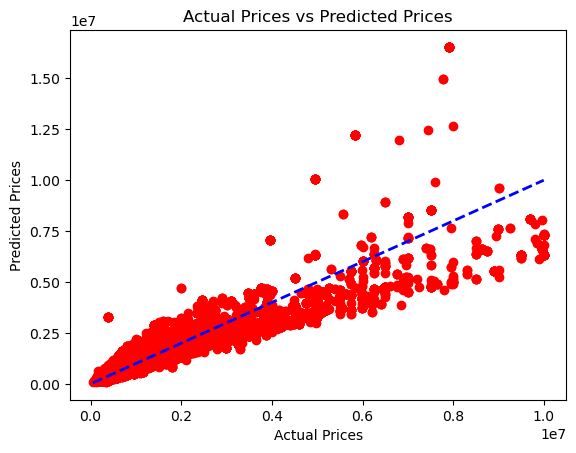

In [21]:
# Visualizing the predicted vs actual values in the test set
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

# Save the chart as a PNG file
plt.savefig('Resources/images/02_Price-Predictor-Linear-Regression.png')

plt.show()